<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/Estadistica/TP3/TP3_FelipeMejias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística para Ciencia de los Datos
# Trabajo práctico 3

- Professor: Jorge Castro.

- Student:  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- October 09th, 2019   

In [0]:
# Libraries required for the exercises
import torch as torch
import numpy as np
import random
import math
import textwrap
import random

from scipy import stats
import statsmodels.api as sm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy import linalg as linalg

# Pandas library for reading csvs
import pandas as pd


# 1) Utilizando la columna Depth.




Primer Análisis: Se escogió la variable cuantitativa Depth.

a-) Para n=40:

1-) El primer paso es escoger n=40 observaciones de la variable depth.

depth data:  [61.9, 62.9, 61.7, 62.1, 60.6, 62.5, 62.8, 60.0, 63.0, 62.4, 62.9, 59.2, 61.3, 62.3, 60.4, 61.9, 58.5, 61.6, 61.9, 63.7, 58.2, 62.1, 58.9, 62.7, 65.8, 61.6, 60.1, 62.0, 62.7, 62.2, 61.0, 62.0, 62.1, 64.0, 62.5, 61.8, 63.1, 62.8, 63.9, 60.5]

2-) El segundo paso es definir la hipotesis nula
Hipotesis Nula: Media Poblacional = 61.78799999999999

3-) El tercer paso es crear 1 intervalo de confianza para la media con un nivel de confianza de 90 y concluir con respecto a la hipótesis nula.

El intervalo de confianza con un 90 es el siguiente:
a-) Límite inferior:  61.47033254975782
b-) Límite superior:  62.2096674502422
R/ Dado que el valor de referencia especificado en H0=Media poblacional=61.78799999999999, está dentro del intervalo de confianza,
   se acepta la hipotesis nula con un nivel de significancia de 0.100000.

3-) El t

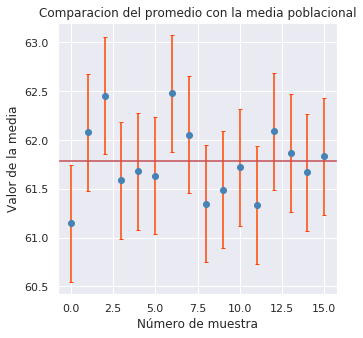

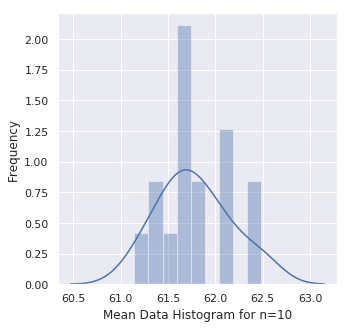


9-) Seleccionar 16 muestras aleatorias con número de observaciones n=25. Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.


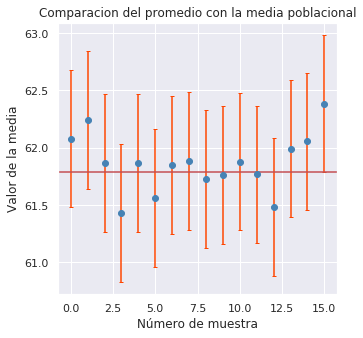

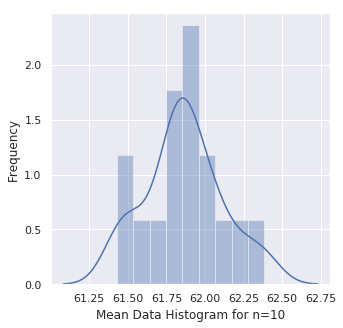

In [12]:
# Exercise 1    
def read_dataset_from_csv():
  def print_dataset(dataset):
    # Set options to show complete dataset columns and rows
    pd.set_option('display.max_columns', None)  
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('max_colwidth', -1)
    print(dataset)
    
  # Set CSV Path
  diamonds_dataset_path = 'https://raw.githubusercontent.com/fmejias/CienciasDeLosDatosTEC/master/Estadistica/TP3/datasetTarea2_v2.csv'
  
  # Read the dataset from csv
  diamonds_dataset = pd.read_csv(diamonds_dataset_path, header=0)
  
  return diamonds_dataset

def set_confidence_interval(population_data, sample_data, n, interval_percentage):
  # Set required data for formula
  standard_deviation_population = np.std(population_data)
  decimal_interval_percentage   = interval_percentage/100
  standard_deviation_sample     = standard_deviation_population/(np.sqrt(n))
  mean_sample                   = np.mean(sample_data)
  alpha                         = 1 - decimal_interval_percentage
  half_alpha                    = alpha/2
  
  # Get Distribution Point Z
  distribution_point_z = abs(stats.norm.ppf(half_alpha))
  
  # Calculate Confidence Interval
  inferior_limit = mean_sample - (standard_deviation_sample * distribution_point_z)
  upper_limit    = mean_sample + (standard_deviation_sample * distribution_point_z)
  return inferior_limit, upper_limit

def print_question(data):
  from termcolor import colored
  print(colored(data, 'blue'))
  
def print_alert(data):
  from termcolor import colored
  print(colored(data, 'red'))
  
def plotting_histogram(data, title):
  # Settings for seaborn plotting style and sizes
  sns.set(color_codes=True)
  sns.set(rc={'figure.figsize':(5,5)})
  
  # Muestro los datos en un histograma (bins = cubetas)
  ax = sns.distplot(data, bins=9, kde=True)
  ax.set(xlabel=title, ylabel='Frequency')
  
  plt.show()

def select_random_samples_and_plot(n, quantitative_variable):
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()

  # Select 16 random samples
  random_samples = []
  data_population = diamonds_dataset[quantitative_variable].values.tolist()
  for i in range(0, 16):
    data_random_sample = random.choices(data_population, k=n-1)
    random_samples.append(data_random_sample)
  
  # Calculate mean for every random sample
  random_samples_mean = []
  for sample in random_samples:
    mean = np.mean(sample)
    random_samples_mean.append(mean)
  
  # Plot comparison with population mean
  population_mean = np.mean(data_population)
  number_of_samples = [i for i in range(0, 16)]
  
  plt.errorbar(number_of_samples, random_samples_mean, yerr=0.6, fmt='o', ecolor='orangered',
            color='steelblue', capsize=2) 
  plt.title('Comparacion del promedio con la media poblacional')
  plt.xlabel('Número de muestra')
  plt.ylabel('Valor de la media')
  
  # Plot population mean
  plt.axhline(y=population_mean, color='r', linestyle='-')
  plt.show()
  
  # Plot histogram
  plotting_histogram(random_samples_mean, 'Mean Data Histogram for n=10')

def calculate_n_size(quantitative_variable, p, interval_percentage=95):
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()
  
  # Get quantitative variable population
  population_data = diamonds_dataset[quantitative_variable].values.tolist()
  
  standard_deviation_population = np.std(population_data)
  decimal_interval_percentage   = interval_percentage/100
  alpha                         = 1 - decimal_interval_percentage
  half_alpha                    = alpha/2
  
  # Get Distribution Point Z
  distribution_point_z = abs(stats.norm.ppf(half_alpha))
  
  # Calculate n
  n = ((standard_deviation_population * distribution_point_z)/p)**2
  return n

def set_conclusion_for_null_hypothesis(null_hypothesis_value, alpha, n, inferior_limit, upper_limit):
  if (null_hypothesis_value > inferior_limit) and (null_hypothesis_value < upper_limit):
    print("R/ Dado que el valor de referencia especificado en H0=Media poblacional=%s, está dentro del intervalo de confianza," % (str(null_hypothesis_value)))
    print("   se acepta la hipotesis nula con un nivel de significancia de %f." % (alpha))
  else:
    print("R/ Dado que el valor de referencia especificado en H0=Media poblacional=%s, está fuera del intervalo de confianza," % (str(null_hypothesis_value)))
    print("   se rechaza la hipotesis nula con un nivel de significancia de %f. Dicho en otras palabras, concluimos que el Depth" % (alpha))
    print("   medio difiere de 63 basados en una muestra de n=%d observaciones" % (n))

def set_sample_and_calculate_confidence_interval(null_hypothesis_value, n, confidence_levels, quantitative_variable, hypothesis):
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()

  # Print Depth Data with chosen n observations
  print_question("\n1-) El primer paso es escoger n=%d observaciones de la variable %s.\n" % (n, quantitative_variable))
  data_population = diamonds_dataset[quantitative_variable].values.tolist()
  data_sample = data_population[:n]
  print("%s data: " % (quantitative_variable) , data_sample)
  
  # Define Null Hypothesis
  print_question("\n2-) El segundo paso es definir la hipotesis nula")
  print(hypothesis)
  
  # Calculate Confidence Levels
  for level in confidence_levels:
    # Define Confidence Interval
    print_question("\n3-) El tercer paso es crear 1 intervalo de confianza para la media con un nivel de confianza de %d y concluir con respecto a la hipótesis nula." % (level))
    inferior_limit, upper_limit = set_confidence_interval(data_population, data_sample, n, interval_percentage=level)
    alpha                       = 1 - level/100
    print("\nEl intervalo de confianza con un %d es el siguiente:" % (level))
    print("a-) Límite inferior: ", inferior_limit)
    print("b-) Límite superior: ", upper_limit)

    # Set conclusion for H0
    set_conclusion_for_null_hypothesis(null_hypothesis_value, alpha, n, inferior_limit, upper_limit)
  

def exercise_with_depth_column():
  # Choose Depth as quantitative variable
  print_question("\nPrimer Análisis: Se escogió la variable cuantitativa Depth.")
  
  # Set Null Hypothesis h0 = population mean
  diamonds_dataset = read_dataset_from_csv()
  data_population = diamonds_dataset['depth'].values.tolist()
  data_population_mean = np.mean(data_population)
  null_hypothesis = "Hipotesis Nula: Media Poblacional = " + str(data_population_mean)
  null_hypothesis_value = data_population_mean
  
  # For n=40
  print_alert("\na-) Para n=40:")
  
  # Calculate confidence_intervals for n=40 with confidence levels of 90%, 95% and 99%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=40, confidence_levels=[90, 95, 99], quantitative_variable='depth', hypothesis=null_hypothesis)
  
  # Explain the influence of the level of confidence
  print_question("\n6-) ¿Qué concluye de los intervalos de confianza anteriores? ¿Aumentan, disminuyen, se mantienen igual? Si hay cambios, ¿por qué ocurre esto?")
  print("""\nR/ Se observa claramente como conforme aumenta el nivel de confianza los intervalos de confianza aumentan.
  Númericamente se observa de forma rápida ya que con un nivel de confianza de 95%, el valor crítico z es de 1.96, mientras que con un.
  nivel de confianza de 99%, el valor crítico z pasa a ser de 2.58 y esto provoca que el intervalo de confianza aumente.
  Además, se tiene más confianza en un intervalo de 99% que en uno de 95% precisamente porque el intervalo es más ancho.
  """)
  
  # Test with 3 different n values
  print_question("""\n7-) Analizar al menos 3 valores de  n , es decir use al menos 3 muestras aleatorias de diferentes tamaños.
  Explique que impacto tiene  n  en el intervalo de confianza, además de la conclusión con la hipótesis nula.
  En este caso haga los cálculos para hacer la prueba de hipótesis para la media usando un nivel de confianza de 95%""")
  
  # For n=80
  print_alert("\na-) Para n=80:")
  
  # Calculate confidence_intervals for n=80 with confidence levels of 95%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=80, confidence_levels=[95], quantitative_variable='depth', hypothesis=null_hypothesis)
  
  # For n=120
  print_alert("\nb-) Para n=120:")
  
  # Calculate confidence_intervals for n=120 with confidence levels of 95%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=120, confidence_levels=[95], quantitative_variable='depth', hypothesis=null_hypothesis)
  
  # For n=20
  print_alert("\nc-) Para n=20:")
  
  # Calculate confidence_intervals for n=20 with confidence levels of 95%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=20, confidence_levels=[95], quantitative_variable='depth', hypothesis=null_hypothesis)
  
  # Explain influence of n in the confidence interval size
  print("""\nR/ Se observa claramente como conforme aumenta el tamaño de la muestra los intervalos de confianza disminuyen, en otras palabras, son menos anchos.
  Númericamente se observa de forma rápida que n se encuentra en el denominador de la ecuación que calcula el intervalo de confianza,
  por lo que entre mayor sea el tamaño de n, los intervalos se expanden menos, y entre más pequeño sea el tamaño de la muestra, más se van a expandir los intervalos.
  """)
  
  # Test with 2 error values
  print_question("""\n8-) Establecer al menos 2 valores de margen de error ρ para la media y determinar cuál sería el tamaño
  de n necesario para poder tener un nivel de confianza de 95%.\n""")
  n1 = calculate_n_size(quantitative_variable='depth', p=0.25, interval_percentage=95)
  print("a-) Para un margen de error p=%f, el valor de n necesario es: %d" %(0.25, n1))
  n2 = calculate_n_size(quantitative_variable='depth', p=0.30, interval_percentage=95)
  print("b-) Para un margen de error p=%f, el valor de n necesario es: %d" %(0.30, n2))
  
  # Choose 16 samples
  print_question("""\n8-) Seleccionar 16 muestras aleatorias con número de observaciones n=10. Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.""")
  select_random_samples_and_plot(n=10, quantitative_variable='depth')
  
  print_question("""\n9-) Seleccionar 16 muestras aleatorias con número de observaciones n=25. Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.""")
  select_random_samples_and_plot(n=25, quantitative_variable='depth')
  
# Test exercise using Depth column
exercise_with_depth_column()

# 2) Utilizando la columna unknownColumn




Segundo Análisis: Se escogió la variable cuantitativa Unknown.

a-) Para n=40:

1-) El primer paso es escoger n=40 observaciones de la variable unknownCol.

unknownCol data:  [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1]

2-) El segundo paso es definir la hipotesis nula
Hipotesis Nula: Media Poblacional = 5.9294252929989675

3-) El tercer paso es crear 1 intervalo de confianza para la media con un nivel de confianza de 90 y concluir con respecto a la hipótesis nula.

El intervalo de confianza con un 90 es el siguiente:
a-) Límite inferior:  4.815166398473025
b-) Límite superior:  5.259833601526974
R/ Dado que el valor de referencia especificado en H0=Media poblacional=5.9294252929989675, está fuera del intervalo de confianza,
   se rechaza la hipotesis nula con un nivel de significancia de 0.100000. Dicho en otras palabras, concluim

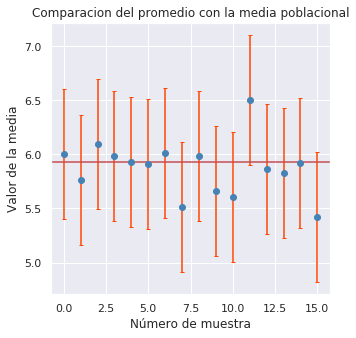

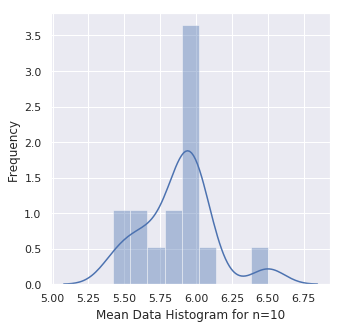


9-) Seleccionar 16 muestras aleatorias con número de observaciones n=25. Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.


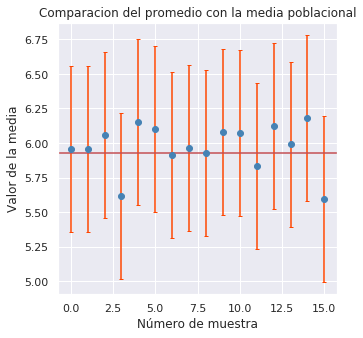

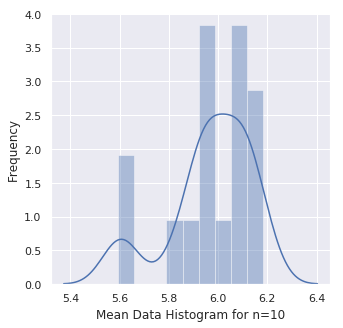

In [13]:
# Exercise 2
def exercise_with_unknown_column():
  # Choose Unknown as quantitative variable
  print_question("\nSegundo Análisis: Se escogió la variable cuantitativa Unknown.")
  
  # Set Null Hypothesis h0 = population mean
  diamonds_dataset = read_dataset_from_csv()
  data_population = diamonds_dataset['unknownCol'].values.tolist()
  data_population_mean = np.mean(data_population)
  null_hypothesis = "Hipotesis Nula: Media Poblacional = " + str(data_population_mean)
  null_hypothesis_value = data_population_mean
  
  # For n=40
  print_alert("\na-) Para n=40:")
  
  # Calculate confidence_intervals for n=40 with confidence levels of 90%, 95% and 99%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=40, confidence_levels=[90, 95, 99], quantitative_variable='unknownCol', hypothesis=null_hypothesis)
  
  # Explain the influence of the level of confidence
  print_question("\n6-) ¿Qué concluye de los intervalos de confianza anteriores? ¿Aumentan, disminuyen, se mantienen igual? Si hay cambios, ¿por qué ocurre esto?")
  print("""\nR/ Se observa claramente como conforme aumenta el nivel de confianza los intervalos de confianza aumentan.
  Númericamente se observa de forma rápida ya que con un nivel de confianza de 95%, el valor crítico z es de 1.96, mientras que con un.
  nivel de confianza de 99%, el valor crítico z pasa a ser de 2.58 y esto provoca que el intervalo de confianza aumente.
  Además, se tiene más confianza en un intervalo de 99% que en uno de 95% precisamente porque el intervalo es más ancho.
  """)
  
  # Test with 3 different n values
  print_question("""\n7-) Analizar al menos 3 valores de  n , es decir use al menos 3 muestras aleatorias de diferentes tamaños.
  Explique que impacto tiene  n  en el intervalo de confianza, además de la conclusión con la hipótesis nula.
  En este caso haga los cálculos para hacer la prueba de hipótesis para la media usando un nivel de confianza de 95%""")
  
  # For n=80
  print_alert("\na-) Para n=80:")
  
  # Calculate confidence_intervals for n=80 with confidence levels of 95%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=80, confidence_levels=[95], quantitative_variable='unknownCol', hypothesis=null_hypothesis)
  
  # For n=120
  print_alert("\nb-) Para n=120:")
  
  # Calculate confidence_intervals for n=120 with confidence levels of 95%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=120, confidence_levels=[95], quantitative_variable='unknownCol', hypothesis=null_hypothesis)
  
  # For n=20
  print_alert("\nc-) Para n=20:")
  
  # Calculate confidence_intervals for n=20 with confidence levels of 95%
  set_sample_and_calculate_confidence_interval(null_hypothesis_value, n=20, confidence_levels=[95], quantitative_variable='unknownCol', hypothesis=null_hypothesis)
  
  # Explain influence of n in the confidence interval size
  print("""\nR/ Se observa claramente como conforme aumenta el tamaño de la muestra los intervalos de confianza disminuyen, en otras palabras, son menos anchos.
  Númericamente se observa de forma rápida que n se encuentra en el denominador de la ecuación que calcula el intervalo de confianza,
  por lo que entre mayor sea el tamaño de n, los intervalos se expanden menos, y entre más pequeño sea el tamaño de la muestra, más se van a expandir los intervalos.
  """)
  
  # Test with 2 error values
  print_question("""\n8-) Establecer al menos 2 valores de margen de error ρ para la media y determinar cuál sería el tamaño
  de n necesario para poder tener un nivel de confianza de 95%.\n""")
  n1 = calculate_n_size(quantitative_variable='unknownCol', p=0.25, interval_percentage=95)
  print("a-) Para un margen de error p=%f, el valor de n necesario es: %d" %(0.25, n1))
  n2 = calculate_n_size(quantitative_variable='unknownCol', p=0.30, interval_percentage=95)
  print("b-) Para un margen de error p=%f, el valor de n necesario es: %d" %(0.30, n2))
  
  # Choose 16 samples
  print_question("""\n8-) Seleccionar 16 muestras aleatorias con número de observaciones n=10. Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.""")
  select_random_samples_and_plot(n=10, quantitative_variable='unknownCol')
  
  print_question("""\n9-) Seleccionar 16 muestras aleatorias con número de observaciones n=25. Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.""")
  select_random_samples_and_plot(n=25, quantitative_variable='unknownCol')
  
# Test exercise using Unknown column
exercise_with_unknown_column()
